In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import plot_confusion_matrix as plt_conf
from sklearn.model_selection import train_test_split as trn
from sklearn.preprocessing import LabelEncoder
!pwd

/Users/gursi/Desktop/ML


In [ ]:
df = pd.read_csv("./datasets/drug200.csv")

In [4]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [5]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [6]:
sex_encode = LabelEncoder()
sex_labels = sex_encode.fit_transform(df.Sex)
sex_labels

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0])

In [7]:
bp_encode = LabelEncoder()
bp_labels = bp_encode.fit_transform(df.BP)
bp_labels

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1])

In [8]:
chol_encode = LabelEncoder()
chol_labels = chol_encode.fit_transform(df.Cholesterol)
chol_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

In [9]:
df = df.drop("Sex", axis = "columns")
df = df.drop("Cholesterol", axis = "columns")
df = df.drop("BP", axis = "columns")

In [10]:
df["chol"] = chol_labels
df["bp"] = bp_labels
df["sex"] = sex_labels
df.head(10)

,Age,Na_to_K,Drug,chol,bp,sex
0,23,25.355,DrugY,0,0,0
1,47,13.093,drugC,0,1,1
2,47,10.114,drugC,0,1,1
3,28,7.798,drugX,0,2,0
4,61,18.043,DrugY,0,1,0
5,22,8.607,drugX,0,2,0
6,49,16.275,DrugY,0,2,0
7,41,11.037,drugC,0,1,1
8,60,15.171,DrugY,0,2,1
9,43,19.368,DrugY,1,1,1


In [11]:
x = np.array(df[["Age", "Na_to_K", "chol", "bp", "sex"]], ndmin=2)
y = np.array(df[["Drug"]])
y = y.reshape(len(y))
y.shape

(200,)

In [12]:
train_x, test_x, train_y, test_y = trn(x, y, test_size=0.2)

In [13]:
np.unique(test_y, return_counts = True)

(array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object),
 array([16,  6,  2,  3, 13]))

In [14]:
ks = 10
acc_array = []

for i in range(1,ks):
    model = kNN(n_neighbors = i)
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    score = acc(test_y, predicted)
    acc_array.append(score)

acc_array = np.array(acc_array)
acc_array

array([0.675, 0.6  , 0.6  , 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.675])

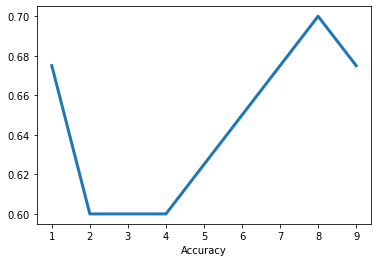

In [15]:
plt.plot(range(1,ks), acc_array, linewidth = 3)
plt.xlabel("Number of neighbors")
plt.xlabel("Accuracy")
plt.show()

In [16]:
ideal = acc_array.argmax() + 1
print("The highest accuracy of", acc_array.max(),"was with", ideal, "neighbors")

The highest accuracy of 0.7 was with 8 neighbors


In [17]:
finalmodel = kNN(n_neighbors = ideal)
finalmodel.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=8)

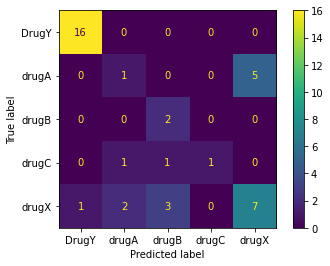

In [18]:
plt_conf(model, test_x, test_y)
plt.show()

In [19]:
user5 = str(input("Sex (M, F) : "))
user1 = int(input("Age : "))
user3 = str(input("Cholesterol level (high, normal) : "))
user4 = str(input("Blood pressure (high, normal, low) : "))
user2 = float(input("Na to K ratio in blood : "))

user3 = chol_encode.transform([user3.upper()])
user4 = bp_encode.transform([user4.upper()])
user5 = sex_encode.transform([user5.upper()])

output = finalmodel.predict([[user1, user2, user3, user4, user5]])
print("Take", output)

Sex (M, F) :  M
Age :  23
Cholesterol level (high, normal) :  high
Blood pressure (high, normal, low) :  normal
Na to K ratio in blood :  14.02


Take ['drugA']
